In [83]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [84]:
#read the dataset
Track_subscription = pd.read_csv('D:\\user_data_set\\user_data_set\\track_subscription_data.csv')
Purchase = pd.read_csv('D:\\user_data_set\\user_data_set\\user_purchase_data.csv')
Quiz = pd.read_csv('D:\\user_data_set\\user_data_set\\user_quiz_attempt_data.csv')
Study_Card = pd.read_csv('D:\\user_data_set\\user_data_set\\user_studycard_data.csv')
Video_activity = pd.read_csv('D:\\user_data_set\\user_data_set\\user_video_activity_data.csv')





In [85]:
#user who has a date_of_first_purhcase is considered as paid user.so defining a new column Paid_flag based on that
def Payment(x):
    category = ""
    if pd.isnull(x):
        category = 'Unpaid'
    else:
        category = 'Paid'
    return category

Purchase['Paid_flag'] = Purchase.apply(lambda x:Payment(x['date_of_first_purhcase']), axis = 1)
Purchase['Paid_flag'].value_counts()

Paid      576
Unpaid    424
Name: Paid_flag, dtype: int64

In [86]:
#Renaming column name
Purchase.rename(columns={'user_uid':'user_id'},inplace=True)

In [87]:
Purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   user_id                 1000 non-null   int64 
 1   date_joined             1000 non-null   object
 2   date_of_first_purhcase  576 non-null    object
 3   Paid_flag               1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [88]:
Purchase.head()

,user_id,date_joined,date_of_first_purhcase,Paid_flag
0,6,2021-06-04,2021-06-04,Paid
1,608,2021-06-04,NaN,Unpaid
2,635,2021-06-04,NaN,Unpaid
3,745,2021-06-04,NaN,Unpaid
4,1506,2021-06-04,NaN,Unpaid


In [89]:
#Convert Type of date columns from Object to Datetime
Purchase['date_joined']=pd.to_datetime(Purchase['date_joined'])
Purchase['date_of_first_purhcase']=pd.to_datetime(Purchase['date_of_first_purhcase'])

In [90]:
Purchase['Diff']= Purchase['date_of_first_purhcase'] - Purchase['date_joined']
Purchase['Diff'].value_counts()

0 days     234
-1 days     80
1 days      54
3 days      34
2 days      30
5 days      18
4 days      17
7 days      12
8 days      10
6 days       8
11 days      7
9 days       7
12 days      6
22 days      5
17 days      5
19 days      5
21 days      4
15 days      4
31 days      3
16 days      3
10 days      3
13 days      3
-2 days      3
32 days      2
23 days      2
18 days      2
24 days      2
14 days      2
25 days      1
26 days      1
20 days      1
27 days      1
35 days      1
30 days      1
34 days      1
29 days      1
28 days      1
45 days      1
48 days      1
Name: Diff, dtype: int64

In [91]:
Purchase['Diff_Days']=Purchase['Diff']/np.timedelta64(1,'D')


Text(0, 0.5, 'COUNT')

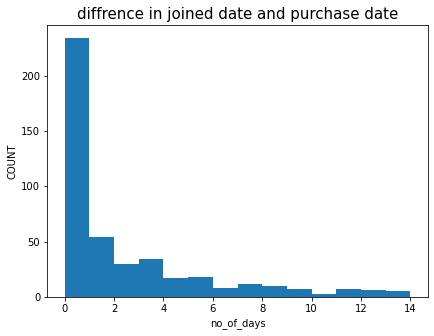

In [92]:
#Understand how many days it is taking for a user to purchase from date of Joining
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
Purchase['Diff_Days'].plot.hist(bins=range(15))
plt.title('diffrence in joined date and purchase date',fontsize=15)
plt.xlabel('no_of_days')
plt.ylabel('COUNT')



From This we can understand most of the users purchase on their initial days of joining

In [93]:
Purchase=Purchase.drop(['Diff_Days','Diff'],axis=1)

In [94]:
Purchase.shape

(1000, 4)

In [95]:
Purchase.head()

,user_id,date_joined,date_of_first_purhcase,Paid_flag
0,6,2021-06-04,2021-06-04,Paid
1,608,2021-06-04,NaT,Unpaid
2,635,2021-06-04,NaT,Unpaid
3,745,2021-06-04,NaT,Unpaid
4,1506,2021-06-04,NaT,Unpaid


In [96]:
#Joining Purchase with Track subscription dataframe
Track_sub1=Track_subscription.merge(Purchase, on = ['user_id'], how = 'inner')

In [97]:

Track_sub1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1578 entries, 0 to 1577
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 1578 non-null   int64         
 1   track_slug              1578 non-null   object        
 2   subscription_date       1578 non-null   object        
 3   date_joined             1578 non-null   datetime64[ns]
 4   date_of_first_purhcase  1096 non-null   datetime64[ns]
 5   Paid_flag               1578 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 86.3+ KB


In [98]:
#changing type of column subscription_date from object to datetime
Track_sub1['subscription_date']=pd.to_datetime(Track_sub1['subscription_date'])


In [99]:
Track_sub1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1578 entries, 0 to 1577
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 1578 non-null   int64         
 1   track_slug              1578 non-null   object        
 2   subscription_date       1578 non-null   datetime64[ns]
 3   date_joined             1578 non-null   datetime64[ns]
 4   date_of_first_purhcase  1096 non-null   datetime64[ns]
 5   Paid_flag               1578 non-null   object        
dtypes: datetime64[ns](3), int64(1), object(2)
memory usage: 86.3+ KB


In [100]:
#Joining Purchase with Quiz dataframe

Quiz1=Quiz.merge(Purchase, on = ['user_id'], how = 'inner')

In [101]:
Quiz1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 0 to 21418
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 21419 non-null  int64         
 1   attempt_id              21419 non-null  int64         
 2   started_at              21419 non-null  object        
 3   status                  21419 non-null  object        
 4   no_of_questions         21419 non-null  int64         
 5   question_attempted      21419 non-null  int64         
 6   date_joined             21419 non-null  datetime64[ns]
 7   date_of_first_purhcase  19997 non-null  datetime64[ns]
 8   Paid_flag               21419 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 1.6+ MB


In [102]:
#Joining Purchase with Study_Card dataframe

Study_Card1=Study_Card.merge(Purchase, on = ['user_id'], how = 'inner')

In [103]:
Study_Card1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3480 entries, 0 to 3479
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 3480 non-null   int64         
 1   activity_id             3480 non-null   int64         
 2   start_time              3480 non-null   object        
 3   date_joined             3480 non-null   datetime64[ns]
 4   date_of_first_purhcase  3325 non-null   datetime64[ns]
 5   Paid_flag               3480 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 190.3+ KB


In [104]:
#Joining Purchase with Video_activity dataframe

Video_activity1=Video_activity.merge(Purchase, on = ['user_id'], how = 'inner')

In [105]:
Video_activity1

,user_id,watch_instance_id,watched_at,video_id,duration,watched_duration,date_joined,date_of_first_purhcase,Paid_flag
0,6,24552452,2021-06-12 18:13:40.347392+00:00,25261,934,2,2021-06-04,2021-06-04,Paid
1,6,24552735,2021-06-12 18:21:45.362998+00:00,25262,398,398,2021-06-04,2021-06-04,Paid
2,6,24011079,2021-06-04 18:27:01.296468+00:00,24920,1589,55,2021-06-04,2021-06-04,Paid
3,6,24011800,2021-06-04 18:51:27.450857+00:00,24531,319,28,2021-06-04,2021-06-04,Paid
4,6,24249571,2021-06-08 11:19:02.187747+00:00,32825,317,15,2021-06-04,2021-06-04,Paid
...,...,...,...,...,...,...,...,...,...
12902,404095,27403959,2021-08-02 13:29:09.039679+00:00,31593,1032,1032,2021-08-02,2021-08-01,Paid
12903,404277,27396584,2021-08-02 11:08:07.956509+00:00,24108,0,163,2021-08-02,2021-08-02,Paid
12904,404277,27398055,2021-08-02 11:34:59.985140+00:00,31592,369,264,2021-08-02,2021-08-02,Paid
12905,404290,27396361,2021-08-02 11:03:56.765507+00:00,13609,59,47,2021-08-02,NaT,Unpaid


#### Paid vs Unpaid - Difference in behaviour in the first week

# Track Subscription Analysis

<AxesSubplot:xlabel='Paid_flag', ylabel='count'>

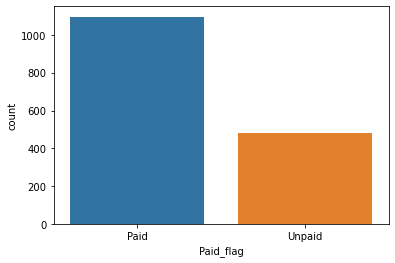

In [106]:
sns.countplot(Track_sub1['Paid_flag'])

Paid customers have more number of subscriptions

Text(0.5, 1.0, 'Tracks v/s Paid_flag')

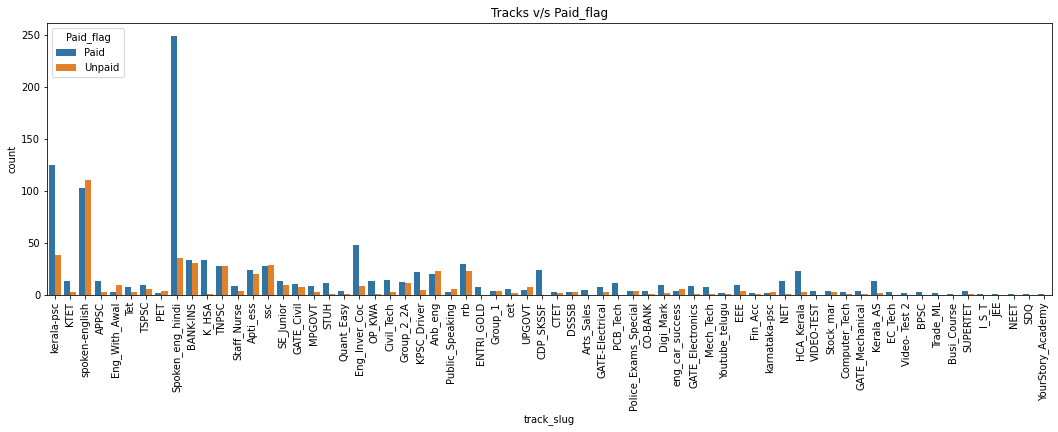

In [107]:
#see which track is having more users among paid and unpaid
plt.figure(figsize = (18,5))
sns.countplot(x='track_slug', hue='Paid_flag', data= Track_sub1).tick_params(axis='x', rotation = 90)
plt.title('Tracks v/s Paid_flag')

Spoken_Eng_Hindi is most popular among paid users and spoken enlish is popular among Unpaid

Text(0.5, 1.0, 'Tracks ')

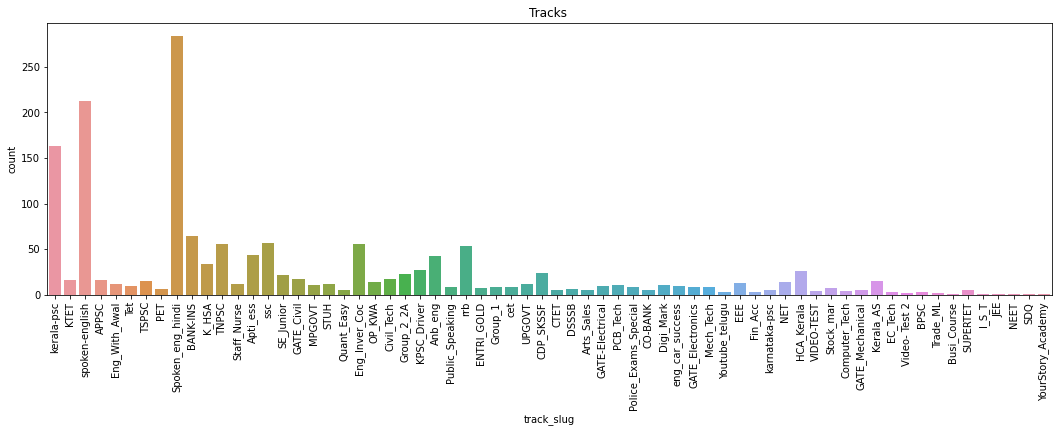

In [108]:
#Find most popular course among all users
plt.figure(figsize = (18,5))
sns.countplot(x='track_slug', data= Track_sub1).tick_params(axis='x', rotation = 90)
plt.title('Tracks ')

Spoken_eng_hindi is most popular

# Quiz Data Analysis

In [109]:
Quiz1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 0 to 21418
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 21419 non-null  int64         
 1   attempt_id              21419 non-null  int64         
 2   started_at              21419 non-null  object        
 3   status                  21419 non-null  object        
 4   no_of_questions         21419 non-null  int64         
 5   question_attempted      21419 non-null  int64         
 6   date_joined             21419 non-null  datetime64[ns]
 7   date_of_first_purhcase  19997 non-null  datetime64[ns]
 8   Paid_flag               21419 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 1.6+ MB


In [110]:
Quiz1.head()

,user_id,attempt_id,started_at,status,no_of_questions,question_attempted,date_joined,date_of_first_purhcase,Paid_flag
0,1506,50839743,None,CREATE,10,0,2021-06-04,NaT,Unpaid
1,1506,50839752,None,PAUSE,10,10,2021-06-04,NaT,Unpaid
2,1642,50842794,2021-06-04 16:52:25.634573+00:00,COMPLETE,10,10,2021-06-04,2021-06-04,Paid
3,1642,50843057,2021-06-04 16:55:37.917805+00:00,COMPLETE,10,10,2021-06-04,2021-06-04,Paid
4,1642,50843164,None,CREATE,10,0,2021-06-04,2021-06-04,Paid


In [111]:
#convert type of column started_at to datetime and replace None with NaN
Quiz1['started_at'] = Quiz1['started_at'].str.split(' ', 1).str[0].str.strip()
Quiz1.replace(to_replace='None', value=np.nan, inplace=True)
Quiz1['started_at']=pd.to_datetime(Quiz1['started_at'])



Quiz1


,user_id,attempt_id,started_at,status,no_of_questions,question_attempted,date_joined,date_of_first_purhcase,Paid_flag
0,1506,50839743,NaT,CREATE,10,0,2021-06-04,NaT,Unpaid
1,1506,50839752,NaT,PAUSE,10,10,2021-06-04,NaT,Unpaid
2,1642,50842794,2021-06-04,COMPLETE,10,10,2021-06-04,2021-06-04,Paid
3,1642,50843057,2021-06-04,COMPLETE,10,10,2021-06-04,2021-06-04,Paid
4,1642,50843164,NaT,CREATE,10,0,2021-06-04,2021-06-04,Paid
...,...,...,...,...,...,...,...,...,...
21414,395414,55869647,NaT,PAUSE,5,5,2021-07-31,2021-08-01,Paid
21415,395414,55870723,2021-08-03,COMPLETE,5,5,2021-07-31,2021-08-01,Paid
21416,395414,55870950,NaT,CREATE,5,0,2021-07-31,2021-08-01,Paid
21417,157791,55877698,2021-08-03,COMPLETE,10,10,2021-06-25,2021-06-25,Paid


Text(0.5, 1.0, 'Difference in days for a user to attempt a quiz from date they joined')

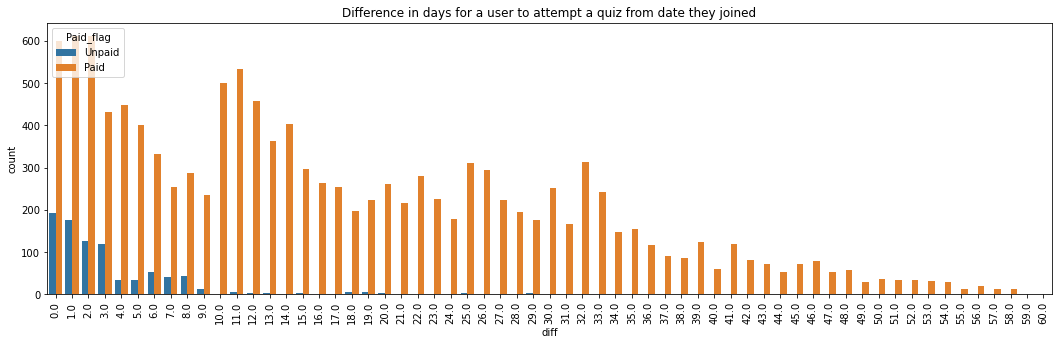

In [112]:
#Understand how many days it is taking for a user to attempt a quiz from the joining date
Quiz1['diff']=(Quiz1['started_at']-Quiz1['date_joined'])/np.timedelta64(1,'D')
plt.figure(figsize = (18,5))
sns.countplot(x='diff', hue='Paid_flag', data= Quiz1).tick_params(axis='x', rotation = 90)
plt.title('Difference in days for a user to attempt a quiz from date they joined')

Most of users attemt quiz on their initials days of joining.They attempt more on first day

<AxesSubplot:xlabel='Paid_flag', ylabel='count'>

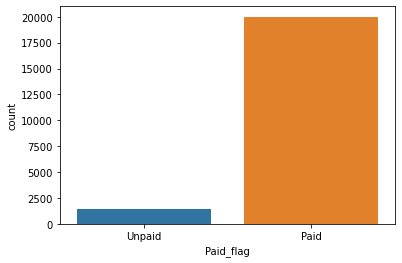

In [113]:
#Find which type user is attempting more number of Quiz
sns.countplot(Quiz1['Paid_flag'])

Paid customers seems to attempt more Quiz

<AxesSubplot:xlabel='status', ylabel='count'>

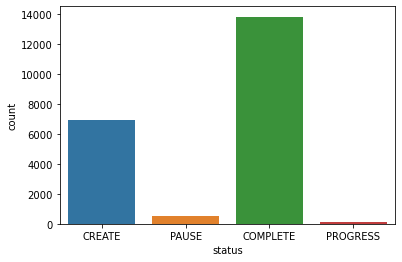

In [114]:
#Find which status is more
sns.countplot(Quiz1['status'])

Most of users try to complete the quiz.Only very less users have status Progress


Text(0.5, 1.0, 'Status v/s Paid_flag')

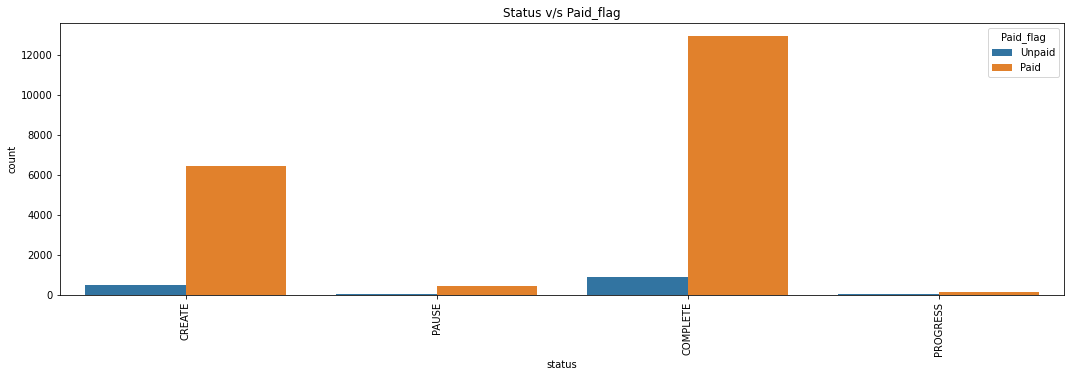

In [115]:
#see the status count for paid and unpaid
plt.figure(figsize = (18,5))
sns.countplot(x='status', hue='Paid_flag', data= Quiz1).tick_params(axis='x', rotation = 90)
plt.title('Status v/s Paid_flag')

most of Paid and Unpaid users tends to complete the quiz

In [116]:
Quiz1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 0 to 21418
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 21419 non-null  int64         
 1   attempt_id              21419 non-null  int64         
 2   started_at              13548 non-null  datetime64[ns]
 3   status                  21419 non-null  object        
 4   no_of_questions         21419 non-null  int64         
 5   question_attempted      21419 non-null  int64         
 6   date_joined             21419 non-null  datetime64[ns]
 7   date_of_first_purhcase  19997 non-null  datetime64[ns]
 8   Paid_flag               21419 non-null  object        
 9   diff                    13548 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int64(4), object(2)
memory usage: 2.4+ MB


Split the Dataframe to 2 dataframe for paid and Unpaid

In [117]:
Quiz1_Paid=Quiz1[Quiz1.Paid_flag=='Paid']

In [118]:
Quiz1_Unpaid=Quiz1[Quiz1.Paid_flag=='Unpaid']

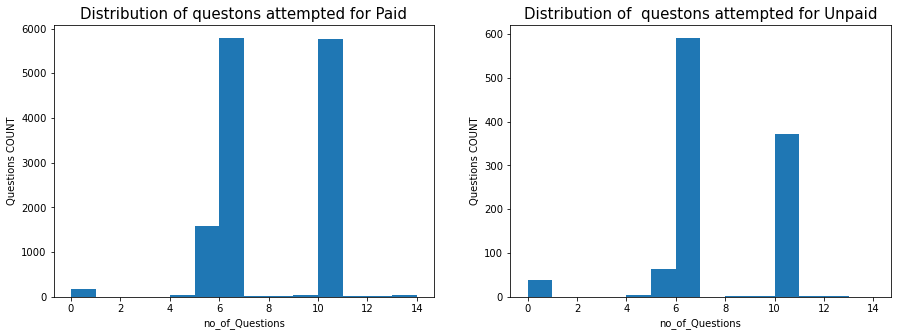

In [119]:
#Find Distribution of Questions attemted for Both users
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
Quiz1_Paid['no_of_questions'].plot.hist(bins=range(15))
plt.title('Distribution of questons attempted for Paid',fontsize=15)
plt.xlabel('no_of_Questions')
plt.ylabel('Questions COUNT')

plt.subplot(1, 2, 2)
Quiz1_Unpaid['no_of_questions'].plot.hist(bins=range(15))
plt.title('Distribution of  questons attempted for Unpaid',fontsize=15)
plt.xlabel('no_of_Questions')
plt.ylabel('Questions COUNT')

plt.show()

Most of them attempt the Quizes having  total  questions 6 and 10

In [120]:
((Quiz1_Paid['question_attempted']/Quiz1_Paid['no_of_questions'])*100).value_counts()

100.000000    10745
0.000000       6839
90.000000       216
83.333333       168
80.000000       154
              ...  
53.846154         1
61.538462         1
70.833333         1
67.500000         1
37.777778         1
Length: 267, dtype: int64

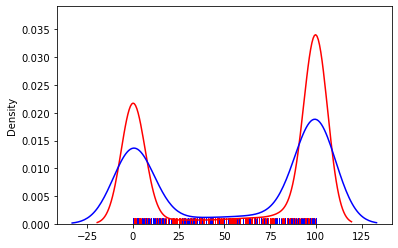

In [121]:
#See the distribution of percentage of questions attempted for paid and unpaid
sns.distplot(((Quiz1_Paid['question_attempted']/Quiz1_Paid['no_of_questions'])*100),hist=False,rug=True,bins=50,color='red')
sns.distplot(((Quiz1_Unpaid['question_attempted']/Quiz1_Unpaid['no_of_questions'])*100),hist=False,rug=True,bins=50,color='blue')
plt.show()

Peaks for both paid and unpaid are at 0 and 100 which means most of them either attempt all questions or not attempt any questions at all

# Studycard data Analysis

In [122]:
Study_Card1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3480 entries, 0 to 3479
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 3480 non-null   int64         
 1   activity_id             3480 non-null   int64         
 2   start_time              3480 non-null   object        
 3   date_joined             3480 non-null   datetime64[ns]
 4   date_of_first_purhcase  3325 non-null   datetime64[ns]
 5   Paid_flag               3480 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 190.3+ KB


In [123]:
Study_Card1.head()

,user_id,activity_id,start_time,date_joined,date_of_first_purhcase,Paid_flag
0,1642,4197126,2021-06-04 16:51:51.454473+00:00,2021-06-04,2021-06-04,Paid
1,1642,4197075,2021-06-04 16:43:10.115201+00:00,2021-06-04,2021-06-04,Paid
2,1642,4197074,2021-06-04 16:43:10.082261+00:00,2021-06-04,2021-06-04,Paid
3,1642,4197577,2021-06-04 18:20:58.487196+00:00,2021-06-04,2021-06-04,Paid
4,1642,4197174,2021-06-04 16:57:46.487970+00:00,2021-06-04,2021-06-04,Paid


In [124]:
#convert type object to datetime
Study_Card1['start_time'] = Study_Card1['start_time'].str.split(' ', 1).str[0].str.strip()
Study_Card1['start_time']=pd.to_datetime(Study_Card1['start_time'])



Study_Card1


,user_id,activity_id,start_time,date_joined,date_of_first_purhcase,Paid_flag
0,1642,4197126,2021-06-04,2021-06-04,2021-06-04,Paid
1,1642,4197075,2021-06-04,2021-06-04,2021-06-04,Paid
2,1642,4197074,2021-06-04,2021-06-04,2021-06-04,Paid
3,1642,4197577,2021-06-04,2021-06-04,2021-06-04,Paid
4,1642,4197174,2021-06-04,2021-06-04,2021-06-04,Paid
...,...,...,...,...,...,...
3475,404095,4610587,2021-08-03,2021-08-02,2021-08-01,Paid
3476,404095,4611111,2021-08-03,2021-08-02,2021-08-01,Paid
3477,404095,4611113,2021-08-03,2021-08-02,2021-08-01,Paid
3478,404095,4611114,2021-08-03,2021-08-02,2021-08-01,Paid


Text(0.5, 1.0, 'Difference in days for a user to intereact with studycared from date they joined')

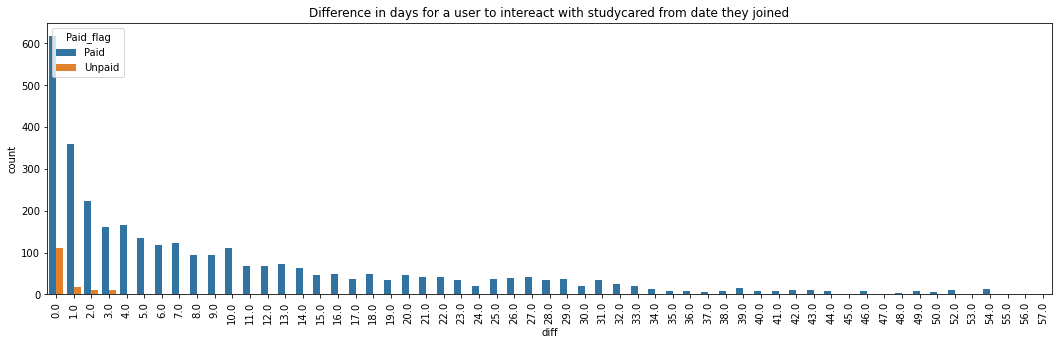

In [125]:
#Find how many days it is taking for a user to interact with a studycard from the date they joined
Study_Card1['diff']=(Study_Card1['start_time']-Study_Card1['date_joined'])/np.timedelta64(1,'D')
plt.figure(figsize = (18,5))
sns.countplot(x='diff', hue='Paid_flag', data= Study_Card1).tick_params(axis='x', rotation = 90)
plt.title('Difference in days for a user to intereact with studycared from date they joined')

Most of them interact with study card on their first day

<AxesSubplot:xlabel='Paid_flag', ylabel='count'>

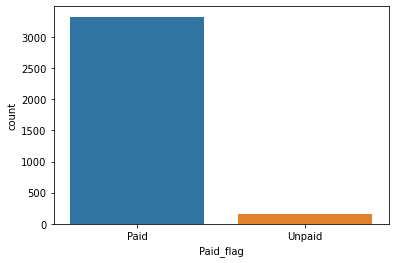

In [126]:
#find who interact with studycard more
sns.countplot(Study_Card1['Paid_flag'])

Paid ones interact with studycard more

# Watched video data Analysis

In [127]:
Video_activity1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12907 entries, 0 to 12906
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 12907 non-null  int64         
 1   watch_instance_id       12907 non-null  int64         
 2   watched_at              12907 non-null  object        
 3   video_id                12907 non-null  int64         
 4   duration                12907 non-null  int64         
 5   watched_duration        12907 non-null  int64         
 6   date_joined             12907 non-null  datetime64[ns]
 7   date_of_first_purhcase  12302 non-null  datetime64[ns]
 8   Paid_flag               12907 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 1008.4+ KB


In [128]:
#Most watched video
Video_activity1['video_id'].value_counts(ascending=False).head(1)


31592    195
Name: video_id, dtype: int64

video_id 31592 is having higher number of watch

<AxesSubplot:xlabel='Paid_flag', ylabel='count'>

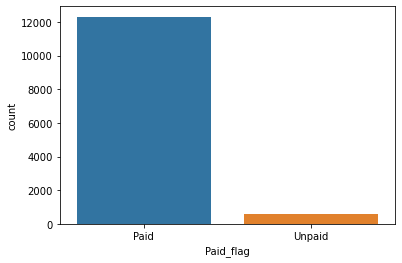

In [129]:
#find which type of user watches more videos
sns.countplot(Video_activity1['Paid_flag'])

Paid customers watch more number of videos

In [130]:
#most watched video among paid
df1=Video_activity1.loc[Video_activity1['Paid_flag'] == 'Paid']

df1['video_id'].value_counts(ascending=False).head(1)


5861    187
Name: video_id, dtype: int64

video_id 5861 is having high number of watch among paid

In [131]:
#most watched video among unpaid

df2=Video_activity1.loc[Video_activity1['Paid_flag'] == 'Unpaid']

df2['video_id'].value_counts(ascending=False).head(1)

22246    26
Name: video_id, dtype: int64

video_id 22246 is having high number of watch among unpaid

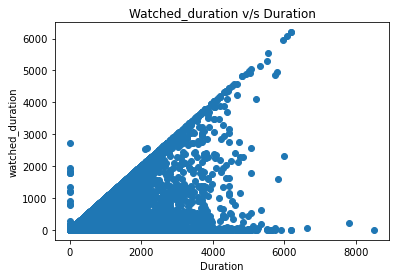

In [132]:
# Let's visualise the data with a scatter plot 
plt.scatter(Video_activity1.duration , Video_activity1.watched_duration)
plt.title('Watched_duration v/s Duration')
plt.xlabel("Duration")
plt.ylabel("watched_duration")
plt.show()

In [133]:
#Change type of column watched_at to datetime
Video_activity1['watched_at'] = Video_activity1['watched_at'].str.split(' ', 1).str[0].str.strip()
Video_activity1['watched_at'] =pd.to_datetime(Video_activity1['watched_at'] )



Video_activity1

,user_id,watch_instance_id,watched_at,video_id,duration,watched_duration,date_joined,date_of_first_purhcase,Paid_flag
0,6,24552452,2021-06-12,25261,934,2,2021-06-04,2021-06-04,Paid
1,6,24552735,2021-06-12,25262,398,398,2021-06-04,2021-06-04,Paid
2,6,24011079,2021-06-04,24920,1589,55,2021-06-04,2021-06-04,Paid
3,6,24011800,2021-06-04,24531,319,28,2021-06-04,2021-06-04,Paid
4,6,24249571,2021-06-08,32825,317,15,2021-06-04,2021-06-04,Paid
...,...,...,...,...,...,...,...,...,...
12902,404095,27403959,2021-08-02,31593,1032,1032,2021-08-02,2021-08-01,Paid
12903,404277,27396584,2021-08-02,24108,0,163,2021-08-02,2021-08-02,Paid
12904,404277,27398055,2021-08-02,31592,369,264,2021-08-02,2021-08-02,Paid
12905,404290,27396361,2021-08-02,13609,59,47,2021-08-02,NaT,Unpaid


Text(0.5, 1.0, 'Difference in days for a user to watch a video from date they joined')

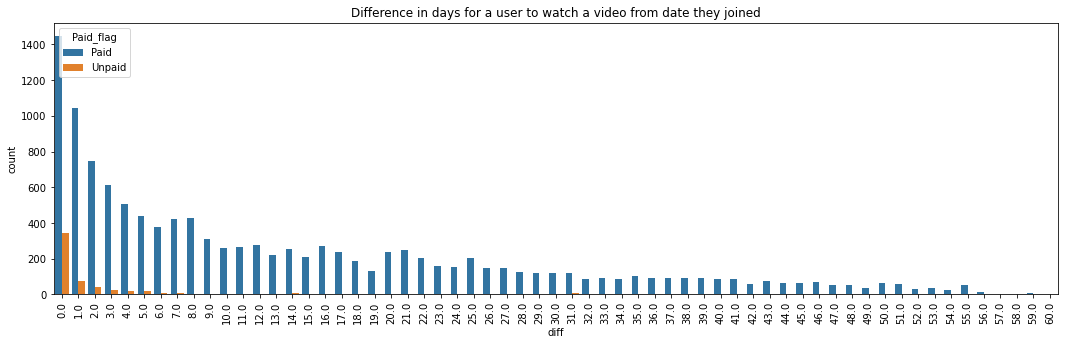

In [134]:
#visualise distribtion of Difference in days for a user to watch a video from date they joined
Video_activity1['diff']=(Video_activity1['watched_at']-Video_activity1['date_joined'])/np.timedelta64(1,'D')
plt.figure(figsize = (18,5))
sns.countplot(x='diff', hue='Paid_flag', data= Video_activity1).tick_params(axis='x', rotation = 90)
plt.title('Difference in days for a user to watch a video from date they joined')

Most of Users Start watching videos on their first days of joining

In [135]:
Video_activity1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12907 entries, 0 to 12906
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 12907 non-null  int64         
 1   watch_instance_id       12907 non-null  int64         
 2   watched_at              12907 non-null  datetime64[ns]
 3   video_id                12907 non-null  int64         
 4   duration                12907 non-null  int64         
 5   watched_duration        12907 non-null  int64         
 6   date_joined             12907 non-null  datetime64[ns]
 7   date_of_first_purhcase  12302 non-null  datetime64[ns]
 8   Paid_flag               12907 non-null  object        
 9   diff                    12907 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int64(5), object(1)
memory usage: 1.7+ MB


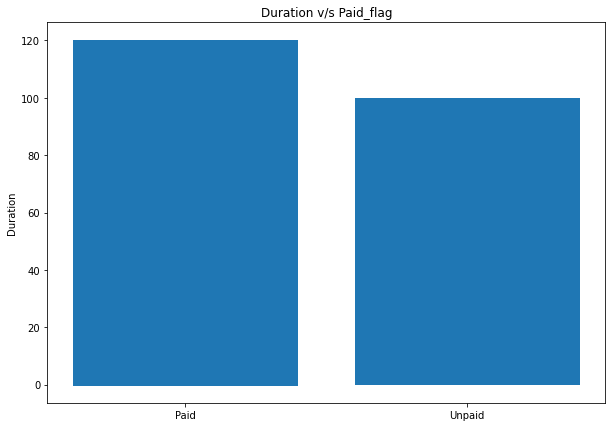

In [136]:
#Visualise percentage of watched duration for paid and unpaid
perc=((Video_activity1['watched_duration']/Video_activity1['duration'])*100)
paid_f=Video_activity1['Paid_flag']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(paid_f, perc)
plt.title('Duration v/s Paid_flag')
plt.ylabel("Duration")

plt.show()

Paid users seems to watch more duration than unpaid

### Per-user targets we should aim to increase conversion percentage.

- Contact the users within 2 days of their joining date.Users are more likely to purchase on their initial days
- Users who subscribe for Spoken_eng and spoken_eng_hindi are more likely to get converted to a paying customer
- Users who attempt more number of Quizes and have status completed can be easily converted to paid customers
- Those customers who interact with studycard on their initial 2 days of joining are more likely to be converted as paid
- More the duration of video watched,more chance that they can be converted

# 